In [4]:
import json
import glob
import os
import matplotlib.pyplot as plt

In [11]:
# evaluate results
offline_evals=[r"logs\2024-08-06-09-16-59-REVIEW46",r"logs\2024-08-06-09-22-19-REVIEW37",r"logs\2024-08-06-09-26-23-REVIEW35"]
raw_log_dir = r"logs\2024-08-06-online-118"
task_res={}
cnt_res={}
step_cnts = {"yes":{},"no":{},"unsure":{}}

for log_dir in offline_evals:
    for eval_dir in glob.glob(log_dir+"/*"):
        try:
            eval_json = json.load(open(os.path.join(eval_dir,"evaluation.log")))
            complete = eval_json.get("complete")
        except:
            continue
        # print(eval_dir)
        # locate the ori log
        response_log = os.path.join(raw_log_dir,os.path.basename(eval_dir),"response.log")
        steps = len(open(response_log,'r').readlines()) - 1
        if steps==0:
            complete="no"
        cnt_res[complete] = cnt_res.get(complete,0) + 1
        task_res[os.path.basename(eval_dir)] = complete
        step_cnts[complete][str(steps)] = step_cnts[complete].get(str(steps),0) + 1
        

print(f"Total tasks: {len(task_res.keys())}")
print(task_res)
print(f"Res Cnts:")
print(cnt_res)
print(f"Success Rate:")
print(cnt_res["yes"] / sum(cnt_res.values()))
print(f"Steps Distribution:")
print(step_cnts)

Total tasks: 118
{'0': 'yes', '1': 'no', '10': 'yes', '100': 'no', '101': 'no', '102': 'no', '103': 'no', '104': 'no', '105': 'yes', '106': 'yes', '107': 'no', '108': 'no', '109': 'no', '11': 'yes', '110': 'yes', '111': 'yes', '112': 'yes', '113': 'no', '114': 'yes', '115': 'yes', '116': 'no', '117': 'yes', '118': 'yes', '119': 'no', '12': 'no', '120': 'yes', '121': 'no', '122': 'unsure', '123': 'no', '124': 'no', '13': 'yes', '14': 'no', '15': 'unsure', '16': 'yes', '17': 'yes', '18': 'no', '19': 'no', '2': 'yes', '20': 'yes', '21': 'yes', '22': 'yes', '23': 'no', '24': 'no', '25': 'yes', '26': 'yes', '27': 'yes', '28': 'yes', '29': 'yes', '30': 'no', '31': 'no', '32': 'yes', '33': 'unsure', '34': 'yes', '35': 'yes', '36': 'yes', '37': 'yes', '38': 'no', '39': 'yes', '40': 'yes', '41': 'yes', '42': 'yes', '43': 'no', '44': 'yes', '45': 'yes', '46': 'no', '47': 'yes', '48': 'yes', '49': 'no', '50': 'no', '51': 'no', '52': 'no', '53': 'no', '54': 'yes', '55': 'yes', '56': 'yes', '57': '

In [16]:


def plot(cnts:dict=None,title:str="",keys:list=None,xlabel:str="",ylabel:str=""):
    if cnts:
        if keys:
            values = [cnts[k] for k in keys]
        else:
            keys = list(cnts.keys())
            values = list(cnts.values())
    try:
        keys, values = zip(*sorted(zip(keys, values), key=lambda x: int(x[0])))
    except Exception as e:
        pass
    # Plotting the histogram with values on the bars
    plt.figure(figsize=(30, 3))
    bars = plt.bar(keys, values, color='skyblue', edgecolor='black')

    # Adding value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, str(height), ha='center', va='bottom')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(keys)  # Ensure all keys are shown on the x-axis
    plt.grid(axis='y')

    # Show the plot
    plt.show()

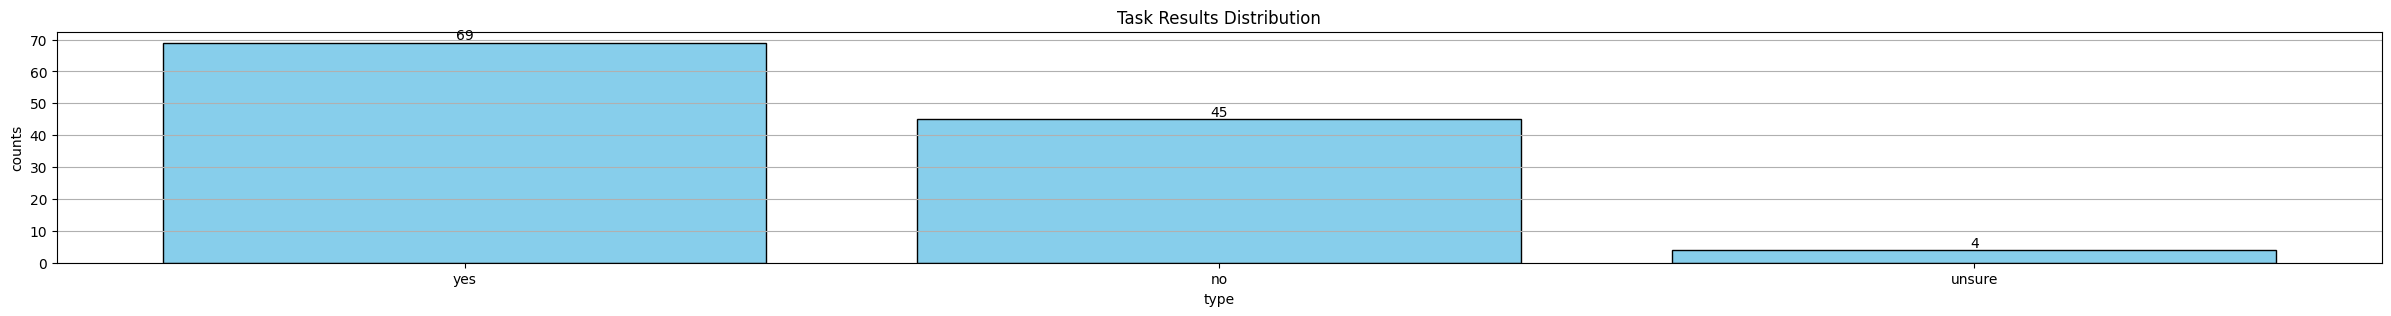

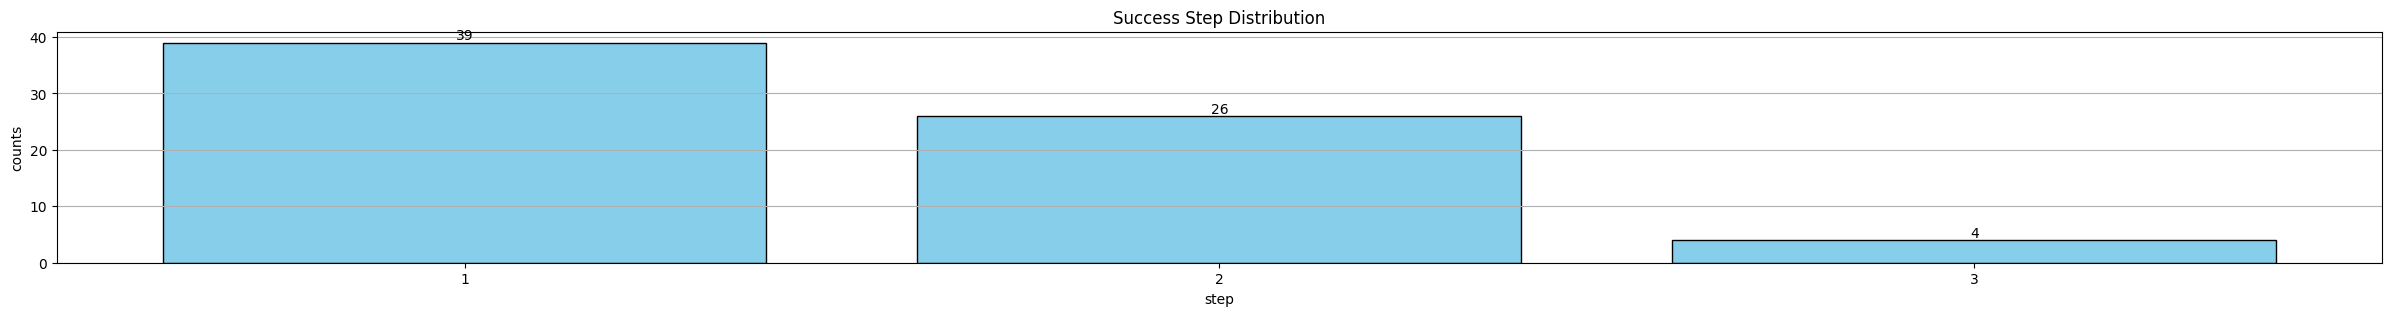

In [17]:
res_cnts={'yes': 69, 'no': 45, 'unsure': 4}
step_cnts ={'3': 4, '1': 39, '2': 26}

plot(res_cnts,title="Task Results Distribution",xlabel="type",ylabel="counts",keys=["yes","no","unsure"])
plot(step_cnts,title="Success Step Distribution",xlabel="step",ylabel="counts")


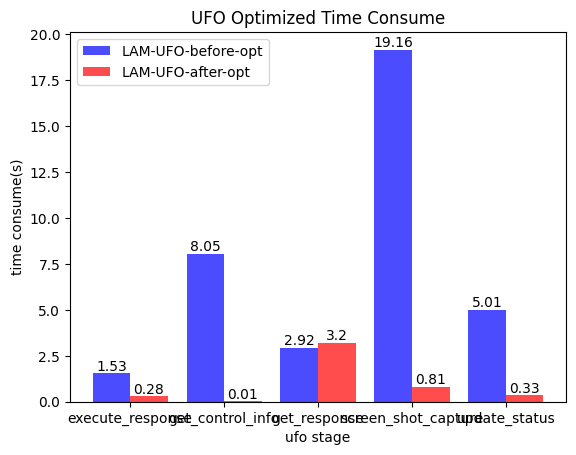

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
x = np.arange(5)
y2 = [0.27669358253479004, 0.0065415700276692705, 3.1952404181162515, 0.8065505822499593, 0.3333781560262044]
y1 = [1.53, 8.05, 2.92, 19.16, 5.01]

# 创建一个图表
fig, ax = plt.subplots()

# 第一个柱状图
bar_width = 0.4  # 设置柱状图的宽度
bars1 = ax.bar(x - bar_width/2, y1, bar_width, label='LAM-UFO-before-opt', color='b', alpha=0.7)

# 第二个柱状图
bars2 = ax.bar(x + bar_width/2, y2, bar_width, label='LAM-UFO-after-opt', color='r', alpha=0.7)

# 添加标签和标题
ax.set_xlabel('ufo stage')
ax.set_ylabel('time consume(s)')
ax.set_title('UFO Optimized Time Consume')
ax.set_xticks(x)
ax.set_xticklabels(['execute_response', 'get_control_info', 'get_response', 'screen_shot_capture', 'update_status'])
ax.legend()

# 在每个柱子上显示数值
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 显示图表
plt.show()
